In [ ]:
# From Sean L. Wu

using Population
using Plots
# using Statistics
# using Distributions
# using LaTeXStrings

In [4]:
# Define daily propensity of death
death = [0.07, 0.004, 0.003, 0.0025, 0.27]

# Define the expected duration of development (in days)
develop = [0.6, 5.0, 5.9, 4.1, Inf]

# Define the rest of the parameters
A0 = 600.0
q = 8.5
tau = 24
# tau is a scaling factor to extend from daily to hourly iterations for more accurracy

24

In [9]:
# this function is a wrapper routine to simulate a deterministic or a stochastic time series
function sim_blowfly(stoch)
    output = zeros(300*tau+1, 5)
    # initiate 5 stages of the population and store them in a vector
    vec = [stoch ? sPop2(PopDataSto()) : sPop2(PopDataDet()) for n in 1:5]
    [AddProcess(v, AgeConst(), AgeFixed()) for v in vec]
    # add individuals to the initial stage (the egg stage)
    AddPop(vec[1], A0)
    # record the initial conditions
    output[1, :] = [GetPop(v) for v in vec]
    # iterate for 300 days
    for n in 1:300*tau
        out = Vector{Any}(nothing, length(vec))
        # for each stage, repeat the following
        for m in 1:length(vec)
            # iterate the stage for one time unit
            pr1 = (prob = death[m]/tau,)
            pr2 = (devmn = develop[m]*tau,)
            out[m] = StepPop(vec[m], pr1, pr2)
        end
        # and pass on to the next stage (if not the adult stage)
        for m in 1:length(vec)-1
            for (q,n) in out[m][3][2]
                AddPop(vec[m+1], n)
            end
        end
        # calculate the number of eggs to produce
        eggs = q * GetPop(vec[5]) * exp(-GetPop(vec[5])/A0)/tau
        AddPop(vec[1], eggs)
        # record the current state
        output[n+1, :] = [GetPop(v) for v in vec]
    end
    # return the results
    return output
end

sim_blowfly (generic function with 1 method)

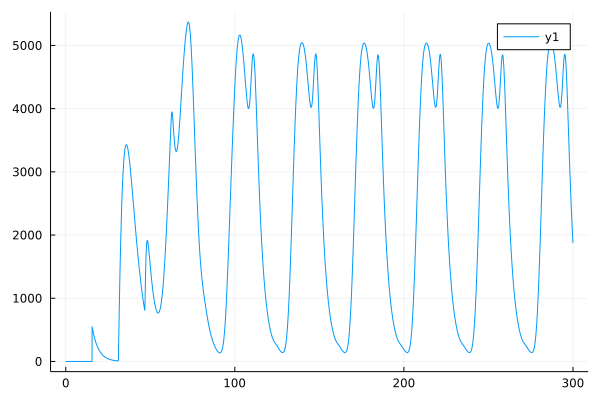

In [10]:
out = sim_blowfly(false)
plot((0:300*tau)/tau, out[:,5])